In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv("EastWestAirlines1.csv")

In [3]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
#normalisation function

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_data_df=scaler.fit_transform(data.iloc[:,1:])

In [6]:
scaled_data_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
#how to find optimum number of cluster 
#the k means algorithm aims to choose centroids that minimise the inertia,or within cluster sum of squares criteria

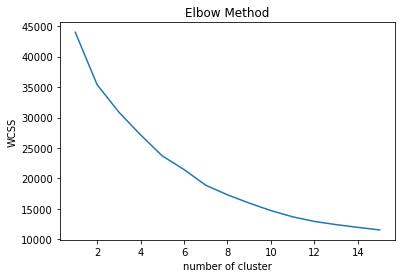

In [10]:
wcss=[]

for i in range (1, 16):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,16),wcss)
plt.title('Elbow Method')
plt.xlabel('number of cluster')
plt.ylabel('WCSS')
plt.show()

In [13]:
#build cluster algorith
from sklearn.cluster import KMeans
clusters_new=KMeans(7,random_state=42)
clusters_new.fit(scaled_data_df)
clusters_new.labels_
#Assign clusters to the data set
data['clusterid_new']=clusters_new.labels_
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [14]:
clusters_new.labels_

array([0, 0, 0, ..., 1, 2, 2])

In [15]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1099.803468,59520.782824,61.928159,1.364988,1.000000,1.000826,6054.080099,8.145334,264.881916,0.810900,5736.347647,0.296449
1,1,1654.413666,120943.810711,57.163435,3.882733,1.000000,1.001847,42818.045245,19.244691,359.110803,1.063712,4788.564174,0.690674
2,2,3066.350793,36573.600276,36.246037,1.269469,1.000000,1.000000,4833.745693,6.776706,167.490696,0.508615,2220.916609,0.142660
3,3,1746.311594,190539.152174,481.405797,2.289855,1.000000,1.000000,33913.355072,28.673913,5779.057971,16.905797,4689.202899,0.797101
4,4,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,5,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
6,6,2083.603448,118527.293103,5486.241379,2.051724,1.000000,1.000000,19386.500000,12.500000,980.724138,2.913793,3928.534483,0.551724
